<a href="https://colab.research.google.com/github/EllouziMedAmin/Data-Science/blob/main/asl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip archive.zip
!rm archive.zip

Archive:  archive.zip
  inflating: asl_data/sign_mnist_train.csv  
  inflating: asl_data/sign_mnist_valid.csv  


In [2]:
!mkdir data
!mv asl_data data

In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

In [5]:
#EDA

In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
#extrating labels
y_train= train_df['label']
y_valid= valid_df['label']
del train_df['label']
del valid_df['label']

In [8]:
x_train= train_df.values
x_valid= valid_df.values

In [10]:
x_train.shape

(27455, 784)

In [11]:
y_train.shape

(27455,)

In [12]:
x_valid.shape

(7172, 784)

In [13]:
y_valid.shape

(7172,)

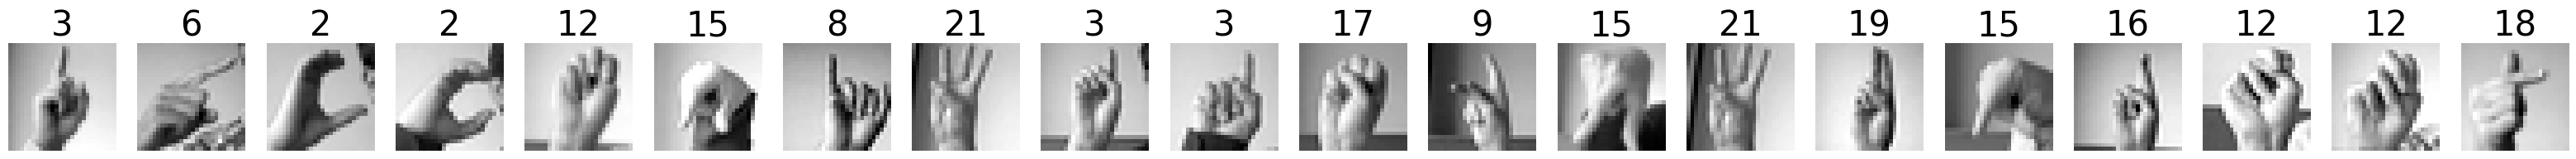

In [14]:
#visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
num_images = 20

def plot_images(num_images):
    for i in range(num_images):
        row = x_train[i]
        label = y_train[i]

        image = row.reshape(28,28)
        plt.subplot(1, num_images, i+1)
        plt.title(label, fontdict={'fontsize': 30})
        plt.axis('off')
        plt.imshow(image, cmap='gray')
plot_images(num_images)



In [15]:
#Normalization
x_train.min(),x_train.max()

(0, 255)

In [16]:
x_train= x_train/255
x_valid= x_valid/255

In [17]:
#Categorization
import tensorflow.keras as keras
num_classes= 24
y_train= keras.utils.to_categorical(y_train, num_classes)
y_valid= keras.utils.to_categorical(y_valid, num_classes)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

In [20]:
model.add(Dense(512, activation='relu' ,input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 676,888 (2.58 MB)

 Trainable params: 676,888 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs = 20, verbose = 1, validation_data = (x_valid, y_valid))

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.2428 - loss: 2.4909 - val_accuracy: 0.5337 - val_loss: 1.3445
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6311 - loss: 1.0979 - val_accuracy: 0.5927 - val_loss: 1.5382
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7770 - loss: 0.6613 - val_accuracy: 0.6854 - val_loss: 1.0397
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8582 - loss: 0.4275 - val_accuracy: 0.7729 - val_loss: 0.9228
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9035 - loss: 0.3029 - val_accuracy: 0.8049 - val_loss: 0.8534
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9319 - loss: 0.2489 - val_accuracy: 0.6566 - val_loss: 1.6018
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9435 - loss: 0.2132 - val_accuracy: 0.8169 - val_loss: 0.9215
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9551 - loss: 0.1874 - val_

In [24]:
x_train.shape, x_valid.shape

((27455, 784), (7172, 784))


In this format, we don't have all the information about which pixels are near each other. Because of this, we can't apply convolutions that will detect features. we should reshape the dataset so that they are in a 28x28 pixel format. This will allow our convolutions to associate groups of pixels and detect important features.

In [25]:
#the images are gray scale so ther are only 1 channel
#we can pass the reshape method a -1 for any dimension we wish to remain the same
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [26]:
x_train.shape

(27455, 28, 28, 1)

In [27]:
x_valid.shape

(7172, 28, 28, 1)

In [28]:
#creating a conolutional model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
#75 refers to the number of filter that will be learned
#(3,3) refers to the size of those filters
#strides refers to the step size
#padding 0 same means that the output image that's created from the filter will match the size of the input image
#batch normalization scals the values in the hidden layers to imporve training
#maxPool2d takes an image and essentially shrinks it to a lower resolution.
#It does this to help the model be robust to translation (objects moving side to side), and also makes our model faster.
# Dropout randomly selects a subset of neurons and turns them off,
#so that they do not participate in forward or backward propagation in that particular pass.
#This helps to make sure that the network is robust and redundant,
# and does not rely on any one area to come up with answers.

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 75)          │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 50)          │          33,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 25)            │          11,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 25)            │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         205,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,049 (1.01 MB)

 Trainable params: 263,749 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

In [31]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 112s 128ms/step - accuracy: 0.7486 - loss: 0.8344 - val_accuracy: 0.8719 - val_loss: 0.3997
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 104s 122ms/step - accuracy: 0.9932 - loss: 0.0216 - val_accuracy: 0.9228 - val_loss: 0.3254
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 141s 120ms/step - accuracy: 0.9958 - loss: 0.0134 - val_accuracy: 0.9375 - val_loss: 0.2647
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 141s 119ms/step - accuracy: 0.9982 - loss: 0.0068 - val_accuracy: 0.9555 - val_loss: 0.1865
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 141s 119ms/step - accuracy: 0.9981 - loss: 0.0074 - val_accuracy: 0.9545 - val_loss: 0.1806
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 143s 120ms/step - accuracy: 0.9988 - loss: 0.0035 - val_accuracy: 0.9654 - val_loss: 0.1562
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 143s 121ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9580 - val_loss: 0.1947
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 103s 121ms/step - accuracy: 0.9998 -

In [33]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)

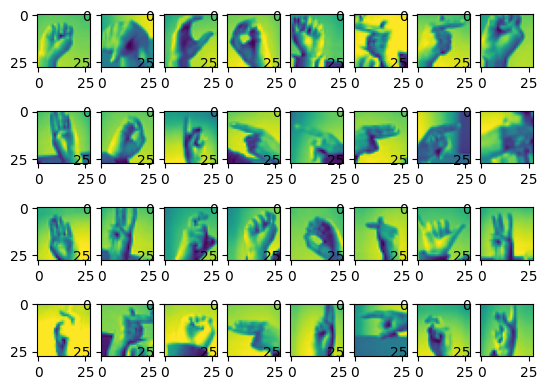

In [36]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = next(img_iter)
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [37]:
datagen.fit(x_train)

In [38]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
#steps * batch_size = number_of_images_trained in an epoch

In [41]:
model.fit(img_iter,
          epochs=20,
          steps_per_epoch=int(len(x_train) / batch_size), # Run same number of steps we would if we were not using a generator.
          validation_data=(x_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


857/857 ━━━━━━━━━━━━━━━━━━━━ 122s 139ms/step - accuracy: 0.4622 - loss: 1.7697 - val_accuracy: 0.8355 - val_loss: 0.4531
Epoch 2/20
  1/857 ━━━━━━━━━━━━━━━━━━━━ 1:26 102ms/step - accuracy: 0.8750 - loss: 0.3661

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


857/857 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8750 - loss: 0.3661 - val_accuracy: 0.8327 - val_loss: 0.4538
Epoch 3/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 130s 132ms/step - accuracy: 0.8842 - loss: 0.3356 - val_accuracy: 0.8931 - val_loss: 0.2782
Epoch 4/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9688 - loss: 0.0683 - val_accuracy: 0.9129 - val_loss: 0.2363
Epoch 5/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 132s 132ms/step - accuracy: 0.9356 - loss: 0.1907 - val_accuracy: 0.9619 - val_loss: 0.0920
Epoch 6/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9375 - loss: 0.0869 - val_accuracy: 0.9071 - val_loss: 0.2801
Epoch 7/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 112s 130ms/step - accuracy: 0.9493 - loss: 0.1485 - val_accuracy: 0.7716 - val_loss: 1.0947
Epoch 8/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 1.0000 - loss: 0.0530 - val_accuracy: 0.9087 - val_loss: 0.2985
Epoch 9/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 139s 134ms/step - accuracy: 0.9604 - loss: 0.1210 - val_accur

In [43]:
model.save('asl_model.h5')

In [44]:
from tensorflow import keras

model = keras.models.load_model('asl_model.h5')

In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 75)          │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 50)          │          33,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 25)            │          11,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 25)            │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         205,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,051 (1.01 MB)

 Trainable params: 263,749 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

 Optimizer params: 2 (12.00 B)

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

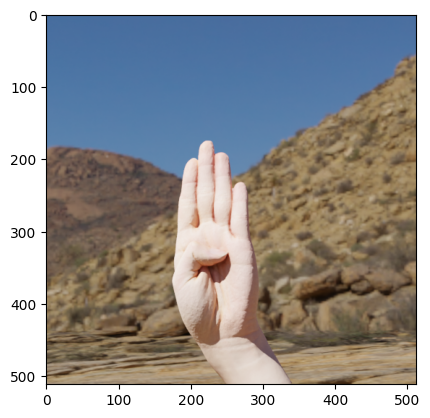

In [58]:
show_image('/content/b.png')

In [59]:
from tensorflow.keras.preprocessing import image as image_utils

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image

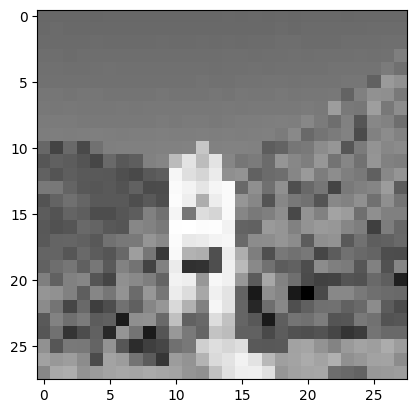

In [60]:
image = load_and_scale_image('/content/b.png')
plt.imshow(image, cmap='gray')

In [61]:
image = image_utils.img_to_array(image)

In [62]:
image = image.reshape(1,28,28,1)

In [63]:
image = image / 255

In [66]:
alphabet = "abcdefghiklmnopqrstuvwxy"
dictionary = {}
for i in range(24):
    dictionary[i] = alphabet[i]
dictionary

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'k',
 10: 'l',
 11: 'm',
 12: 'n',
 13: 'o',
 14: 'p',
 15: 'q',
 16: 'r',
 17: 's',
 18: 't',
 19: 'u',
 20: 'v',
 21: 'w',
 22: 'x',
 23: 'y'}

In [68]:
def predict_letter(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,28,28,1)
    image = image/255
    prediction = model.predict(image)
    predicted_letter = dictionary[np.argmax(prediction)]
    return predicted_letter

In [72]:
valid=pd.read_csv("data/asl_data/sign_mnist_valid.csv")

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,9,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [74]:
x_test=valid.iloc[:,1:].values
y_test=valid.iloc[:,0].values

In [75]:
x_test.shape

(7172, 784)

In [76]:
y_test.shape

(7172,)

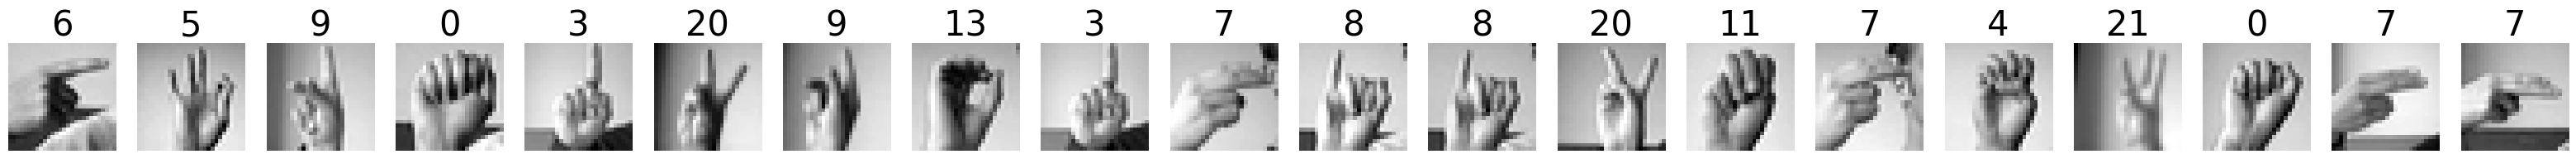

In [79]:
plt.figure(figsize=(40,40))

for i in range(20):
    row = x_test[i]
    label = y_test[i]

    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')


In [80]:
x_test=x_test/255

In [81]:
x_test=x_test.reshape(-1,28,28,1)

In [83]:
x_test.shape

(7172, 28, 28, 1)

In [85]:
x_test.min(),x_test.max()

(0.0, 1.0)

In [88]:
predictions = model.predict(x_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step


In [89]:
predicted_classes = np.argmax(predictions, axis=1)

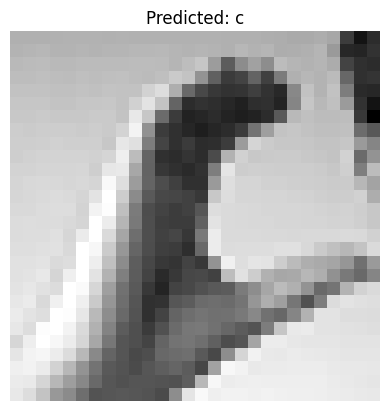

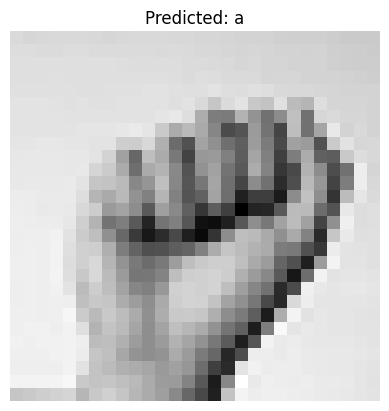

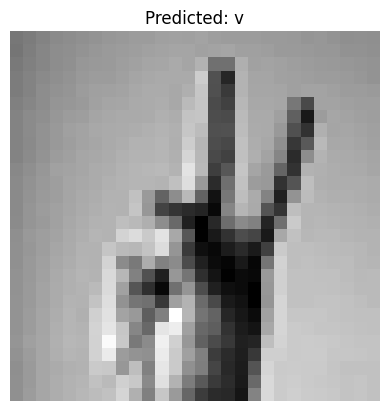

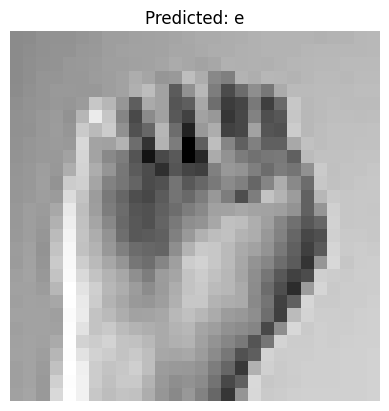

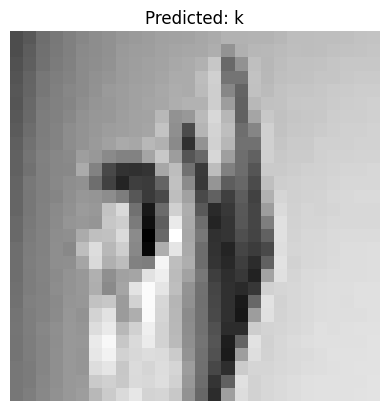

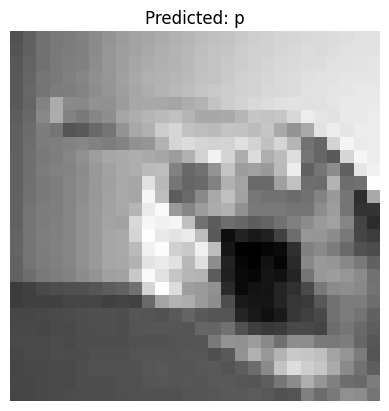

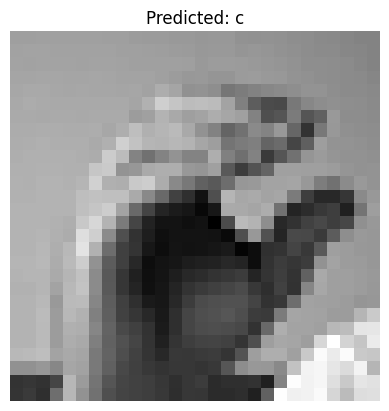

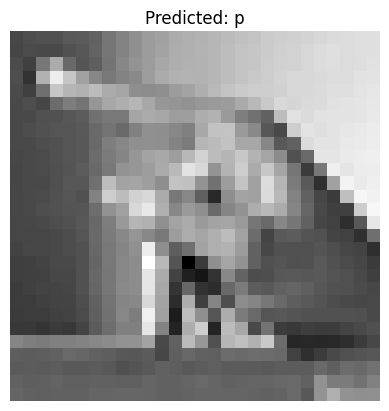

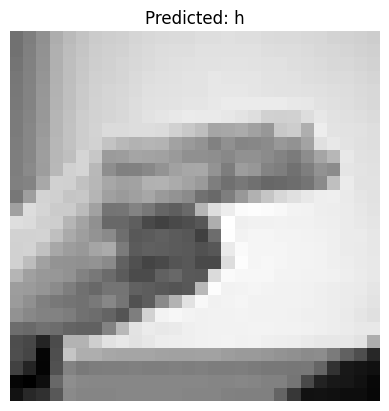

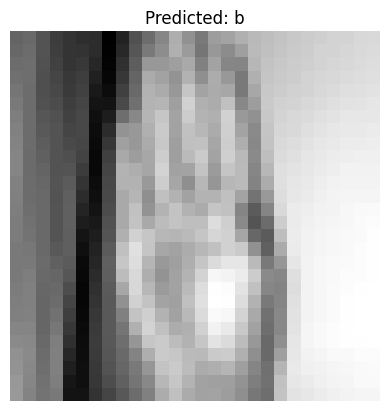

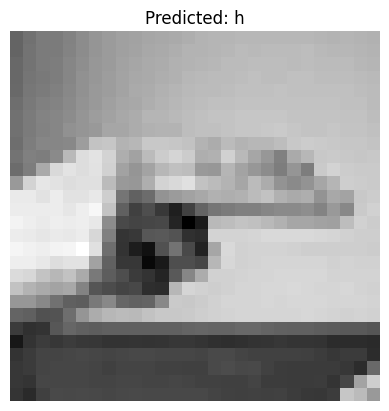

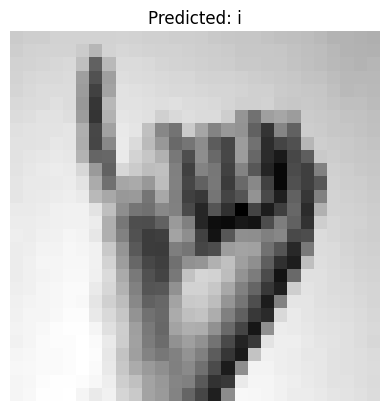

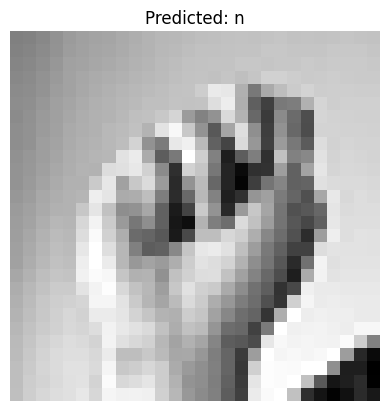

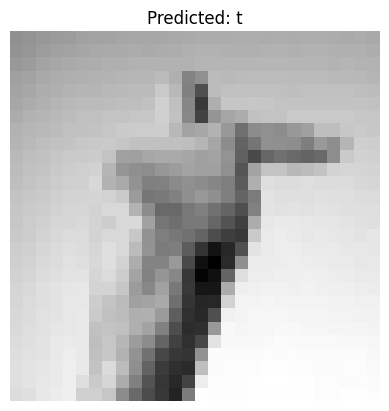

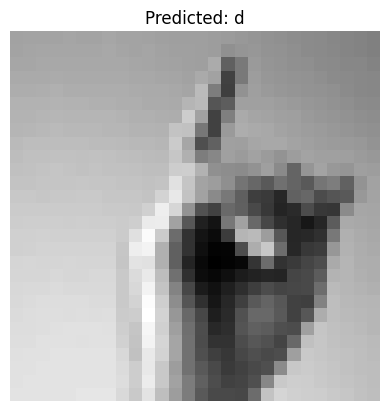

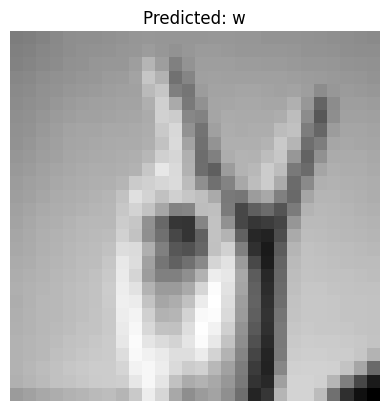

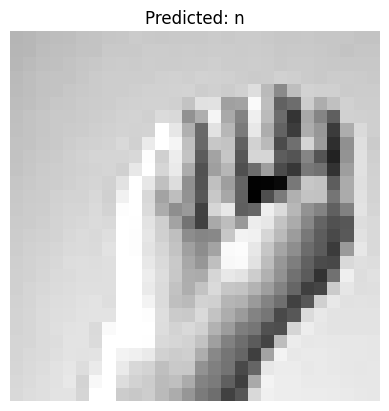

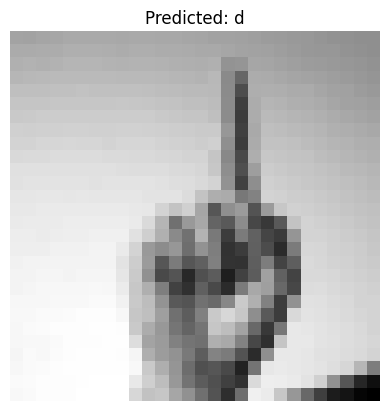

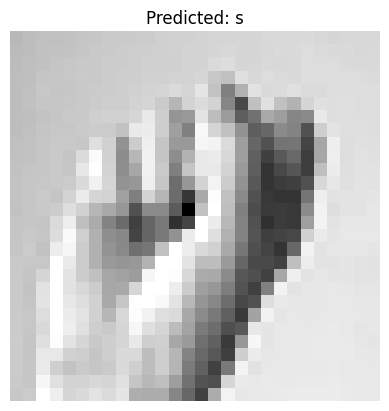

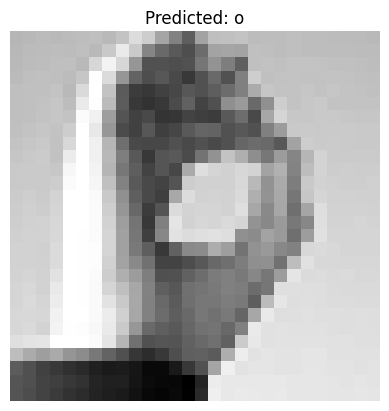

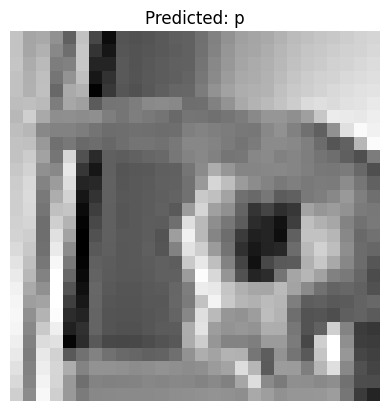

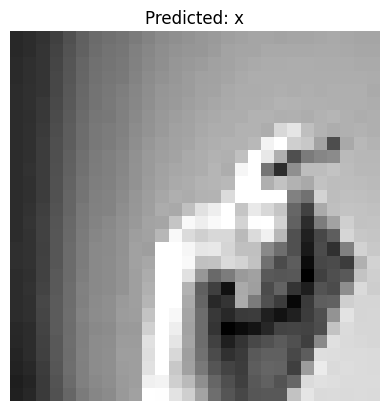

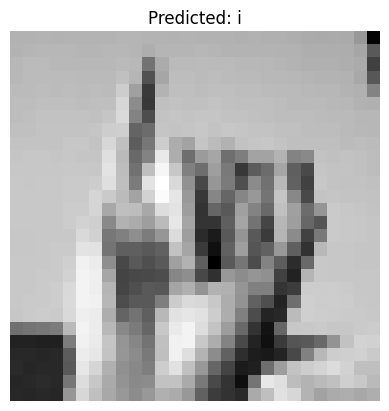

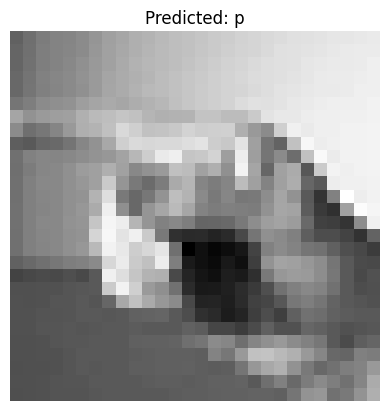

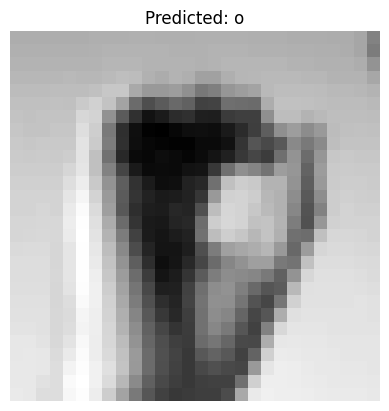

In [93]:
for i in range(20,45):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {dictionary[predicted_classes[i]]}")
    plt.axis('off')
    plt.show()